## Exercise: Predicting House Prices with Linear Regression
In this exercise, you will build a simple machine-learning model to predict house prices based on given features. 
This is a supervised learning example, because we give the output (the price of the houses), for the given inputs (the features) and try to build up a model to infer or predict the price of future houses on the market. 
First we will start with linear regression, which does not use Neural Networks 
    

Adjusted Dataset:
    Size (m²)  Bedrooms  Bathrooms  Garage Size  Age (Years)  \
0         52         1          1            0           30   
1         58         2          1            1           20   
2         72         2          2            1           50   
3         84         2          2            2           10   
4         91         3          2            1           25   
5        103         3          3            2           40   
6        107         3          2            2            5   
7        110         4          3            2           15   
8        135         4          3            2           45   
9        160         4          3            3            8   

   Distance to City Center (km)  Renovation Status  Price ($1000s)  
0                            10                  0           408.5  
1                             8                  1           456.5  
2                            15                  0           489.0  
3          

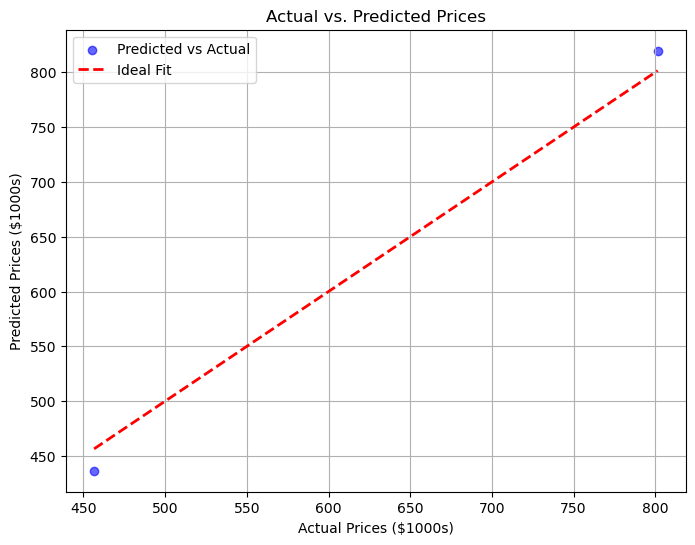

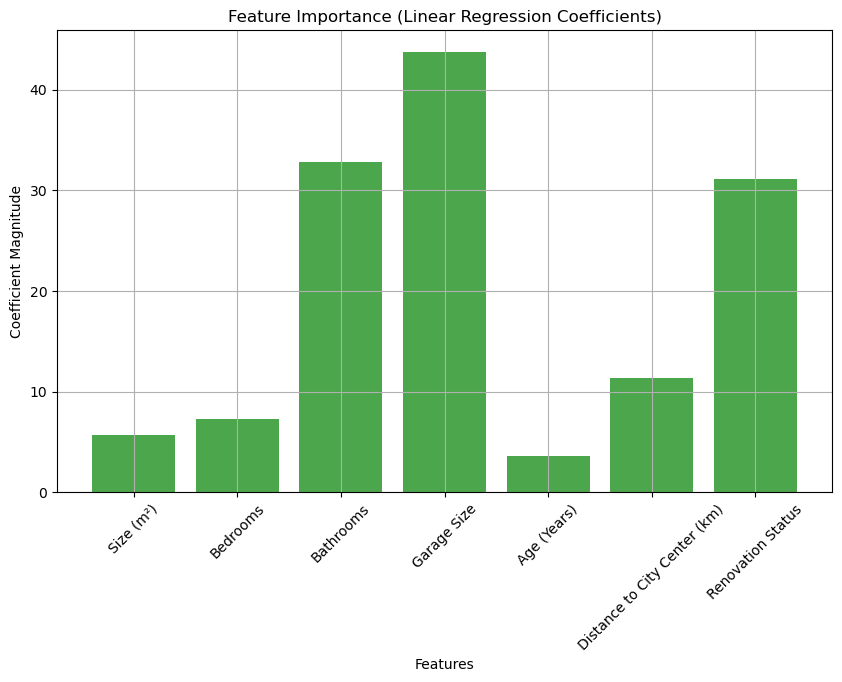

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Create the adjusted dataset with realistic price variations
# ------------------------------------------------------------
data = pd.DataFrame({
    "Size (m²)": [52, 58, 72, 84, 91, 103, 107, 110, 135, 160],  # House sizes in m²
    "Bedrooms": [1, 2, 2, 2, 3, 3, 3, 4, 4, 4],                     # Number of bedrooms
    "Bathrooms": [1, 1, 2, 2, 2, 3, 2, 3, 3, 3],                   # Number of bathrooms
    "Garage Size": [0, 1, 1, 2, 1, 2, 2, 2, 2, 3],                 # Garage size in cars
    "Age (Years)": [30, 20, 50, 10, 25, 40, 5, 15, 45, 8],         # Age of the house in years
    "Distance to City Center (km)": [10, 8, 15, 5, 7, 12, 4, 6, 13, 3],  # Distance to city center
    "Renovation Status": [0, 1, 0, 2, 1, 0, 2, 1, 0, 2],           # 0=Old, 1=Medium, 2=New
    "Price ($1000s)": [408.5, 456.5,489.0,607.8, 621.5, 650.5,739.0,737.0,801.5,1002.0]
})

print("Adjusted Dataset:\n", data)

# Step 2: Define features and target
X = data[["Size (m²)", "Bedrooms", "Bathrooms", "Garage Size", "Age (Years)",
          "Distance to City Center (km)", "Renovation Status"]]
y = data["Price ($1000s)"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")

print("y_test:",y_test)
print("y_pred:",y_pred)

# Step 6: Visualizations
# -----------------------
# 1. Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.title("Actual vs. Predicted Prices")
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Feature Importance Visualization
coefficients = model.coef_
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, np.abs(coefficients), color='green', alpha=0.7)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
